### Import necessary libraries

In [68]:
import pandas as pd

In [69]:
import numpy as np

In [70]:
import matplotlib.pyplot as plt

In [71]:
import seaborn as sns

## Task1:  Read the data and clean up

#### Read books

In [72]:
books=pd.read_csv("./Data/Book_reviews/BX-Books.csv", engine="python", sep=',', quotechar='"' )
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN,NaN,NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN,NaN,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN,NaN,NaN,NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN,NaN,NaN


#### Read users

In [73]:
users=pd.read_csv("./Data/Book_reviews/BX-Users.csv", engine="python", sep=',', quotechar='"' )
users.head()

,User-ID,Location,Age,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1,"nyc, new york, usa",NaN,NaN,NaN,NaN
1,2,"stockton, california, usa",18,NaN,NaN,NaN
2,3,"moscow, yukon territory, russia",NaN,NaN,NaN,NaN
3,4,"porto, v.n.gaia, portugal",17,NaN,NaN,NaN
4,5,"farnborough, hants, united kingdom",NaN,NaN,NaN,NaN


#### Read ratings

In [74]:
ratings=pd.read_csv("./Data/Book_reviews/BX-Book-Ratings.csv", engine="python", sep=',', quotechar='"' )
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


#### Table cleaning

In [75]:
users = users.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
print(users)

        User-ID                            Location  Age
0             1                  nyc, new york, usa  NaN
1             2           stockton, california, usa   18
2             3     moscow, yukon territory, russia  NaN
3             4           porto, v.n.gaia, portugal   17
4             5  farnborough, hants, united kingdom  NaN
...         ...                                 ...  ...
278846   278854               portland, oregon, usa  NaN
278847   278855  tacoma, washington, united kingdom   50
278848   278856           brampton, ontario, canada  NaN
278849   278857           knoxville, tennessee, usa  NaN
278850   278858                dublin, n/a, ireland  NaN

[278851 rows x 3 columns]


In [76]:
books = books.drop(['Unnamed: 8','Unnamed: 9','Unnamed: 10', 'Unnamed: 11'], axis=1)
print(books)

              ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271374  0440400988                         There's a Bat in Bunk Five   
271375  0525447644                            From One to One Hundred   
271376  006008667X  Lily Dale : The True Story of the Town that Ta...   
271377  0192126040                        Republic (World's Classics)   
271378  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bru

#### Cleaning from empty and wrong values

In [77]:
ratings = ratings[(ratings[['Book-Rating']] != 0).all(axis=1)]

In [78]:
indexes = books[books['Book-Author'].str.contains(r'[0-9]')==True].index
books.drop(indexes, inplace=True, axis=0)

In [79]:
indexes2 = books.index[books['Year-Of-Publication'].str.contains(r'[a-zA-Z]')==True]
books.drop(indexes2, 0, inplace=True)

In [80]:
users.dropna(subset=['Age'], inplace=True)
users

,User-ID,Location,Age
1,2,"stockton, california, usa",18
3,4,"porto, v.n.gaia, portugal",17
5,6,"santa monica, california, usa",61
9,10,"albacete, wisconsin, spain",26
10,11,"melbourne, victoria, australia",14
...,...,...,...
278841,278849,"georgetown, ontario, canada",23
278843,278851,"dallas, texas, usa",33
278844,278852,"brisbane, queensland, australia",32
278845,278853,"stranraer, n/a, united kingdom",17


In [81]:
i = users[users['Age'].str.contains('[a-zA-Z]')].index
users.drop(i, 0, inplace=True)

In [82]:
users['Age'] = users['Age'].apply(lambda x: str(x).replace(';"', '') if ';"' in str(x) else str(x))

In [83]:
books['Year-Of-Publication'].astype('int64')

0         2002
1         2001
2         1991
3         1999
4         1999
          ... 
271374    1988
271375    1991
271376    2004
271377    1996
271378    2000
Name: Year-Of-Publication, Length: 271117, dtype: int64

In [84]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [85]:
indexZeros = books[ books['Year-Of-Publication'] == 0 ].index
books.drop(indexZeros , inplace=True)

In [86]:
indexYear = books[ books['Year-Of-Publication'] > 2020 ].index
books.drop(indexYear , inplace=True)

#### Clean Location column of users table

In [87]:
invalid_location = users[users['Location'].str.contains(r'&#|\d')==True].index
users.drop(invalid_location, inplace=True, axis=0)


### Augment data with additional columns

##### Add Country column in users data

In [88]:
users['Country']=users['Location'].str.split(',').str[2]
users['Country']=users['Country'].astype('str')
users.head()

,User-ID,Location,Age,Country
1,2,"stockton, california, usa",18,usa
3,4,"porto, v.n.gaia, portugal",17,portugal
5,6,"santa monica, california, usa",61,usa
9,10,"albacete, wisconsin, spain",26,spain
10,11,"melbourne, victoria, australia",14,australia


#### Add City column in users data

In [89]:
users['City']=users['Location'].str.split(',').str[0]
users['City']=users['City'].astype('str')
users.head()

,User-ID,Location,Age,Country,City
1,2,"stockton, california, usa",18,usa,stockton
3,4,"porto, v.n.gaia, portugal",17,portugal,porto
5,6,"santa monica, california, usa",61,usa,santa monica
9,10,"albacete, wisconsin, spain",26,spain,albacete
10,11,"melbourne, victoria, australia",14,australia,melbourne


#### Filter cities

In [90]:
invalid_location2 = users[~users['City'].str.contains(r'[a-zA-Z]')==True].index
users.drop(invalid_location2, inplace=True, axis=0)

#### Adding new column to books table - total number of books per author

In [91]:
books['Total_num']=books.groupby(by='Book-Author')['Book-Author'].transform('count')
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Total_num
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,2.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1.0


### Analysis

#### Question 1: Which publisher has the least books?

In [92]:
publisher=books['Publisher'].value_counts()
print(publisher)

Harlequin                   7536
Silhouette                  4220
Pocket                      3868
Ballantine Books            3761
Bantam Books                3641
                            ... 
Gould Publications             1
A Disney/Bantam Books          1
KarToBi Publishing, Inc.       1
ESP Publishing                 1
Hawkmoon Publications          1
Name: Publisher, Length: 16374, dtype: int64


#### Question 2: Which year has maximum number of publicised books?

In [93]:
year=books['Year-Of-Publication'].value_counts()
print(year)

2002    17613
1999    17416
2001    17349
2000    17222
1998    15748
        ...  
2008        1
1917        1
1919        1
2012        1
1806        1
Name: Year-Of-Publication, Length: 108, dtype: int64


#### Question 3: Which country has the most users?

In [94]:
country=users['Country'].value_counts()
print(country)

 usa                        76169
 spain                      12527
 united kingdom             12355
 canada                     11327
 germany                    10536
                            ...  
 ouranos                        1
 phillipines                    1
 voivodina                      1
 provincia del cachapoal        1
 a new year is ahead            1
Name: Country, Length: 584, dtype: int64


#### Question 4: Which books are Top 10? 

In [95]:
best_book=pd.merge(ratings, books, on='ISBN', how='inner')


In [96]:
x=best_book.groupby('Book-Title')['Book-Rating'].mean()
sorted_data = x.sort_values( ascending=False)
sorted_data.head(10)

Book-Title
Orvis Fly Fishing Guide (Nick Lyons Books)                             10.0
New Kid in School (Lizzie McGuire, #6)                                 10.0
The Velveteen Rabbit (Creative Editions)                               10.0
Ezra Nehemiah (Collegeville Bible Commentary Old Testament 11)         10.0
New Improved!: Dykes to Watch Out for (Dykes to Watch Out for)         10.0
Ezekiel, Daniel (Collegeville Bible Commentary. Old Testament ; 16)    10.0
Eyewitness: Titanic                                                    10.0
Eyewitness: Renaissance (Eyewitness Books)                             10.0
Eyewitness: Music                                                      10.0
Eyewitness: American Revolution (Eyewitness Books)                     10.0
Name: Book-Rating, dtype: float64

#### Question 5: Which publisher has the best books? (by book rating)

In [97]:
publisher=best_book.groupby('Publisher')['Book-Rating'].mean()
sort_publishers=publisher.sort_values( ascending=False)
sort_publishers.head(1)

Publisher
 Editions P. Terrail    10.0
Name: Book-Rating, dtype: float64

#### Question 6:Which centry has the most published books?

In [98]:
centry=books.groupby(pd.cut(books['Year-Of-Publication'], np.arange(1300,2020,100))).count()
centry

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Total_num
Year-Of-Publication,,,,,,,,,
"(1300, 1400]",2,2,2,2,2,2,2,2,2
"(1400, 1500]",0,0,0,0,0,0,0,0,0
"(1500, 1600]",0,0,0,0,0,0,0,0,0
"(1600, 1700]",0,0,0,0,0,0,0,0,0
"(1700, 1800]",0,0,0,0,0,0,0,0,0
"(1800, 1900]",5,5,5,5,5,5,5,5,5
"(1900, 2000]",211281,211281,211280,211281,211281,211281,211281,211270,211280


Text(0, 0.5, 'Number of books')

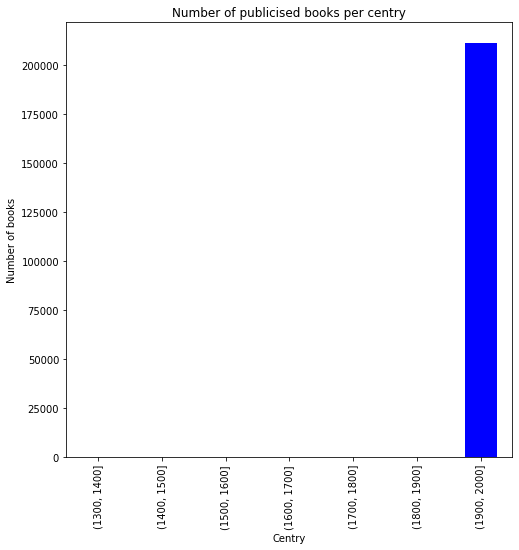

In [99]:
centries=['1300', '1400', '1500', '1600', '1700', '1800', '1900', '2000']
ax = centry.plot(kind='bar', legend=False, color='blue',figsize=(8,8))
ax.set_title('Number of publicised books per centry')
ax.set_xlabel('Centry')
ax.set_ylabel('Number of books')

#### Question 7: Number of publicised books by publisher - ranged top 15 publishers



In [100]:
publ = books.groupby(['Publisher'])
p = publ['Book-Title'].count().sort_values(ascending=False)
p = p.head(15)

Text(0, 0.5, 'Number of books')

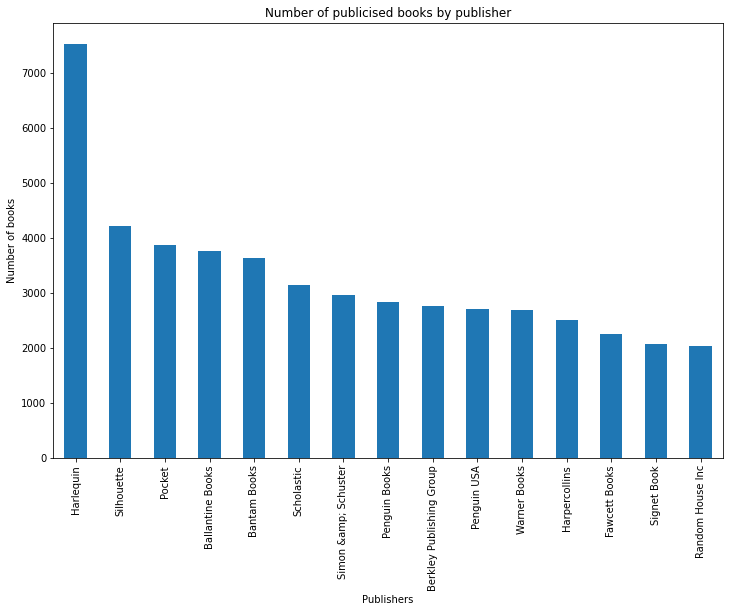

In [101]:
plt.figure(figsize=(12, 8))
ax = p.plot(kind='bar')
ax.set_title('Number of publicised books by publisher')
ax.set_xlabel('Publishers')
ax.set_ylabel('Number of books')

#### Question 8: Which cities in Washington has most dissatisfied users? (Users that gives the lowest ratings)

In [102]:
users_ratings=pd.merge(ratings, users, on='User-ID', how='inner')
users_ratings.head()

,User-ID,ISBN,Book-Rating,Location,Age,Country,City
0,276729,052165615X,3.0,"rijeka, n/a, croatia",16,croatia,rijeka
1,276729,0521795028,6.0,"rijeka, n/a, croatia",16,croatia,rijeka
2,276737,0600570967,6.0,"sydney, new south wales, australia",14,australia,sydney
3,276745,342310538,10.0,"berlin, berlin, germany",27,germany,berlin
4,276747,0060517794,9.0,"iowa city, iowa, usa",25,usa,iowa city


In [103]:
usa = users_ratings[users_ratings['Location'].str.contains(r'washington')==True]
city_rating=usa.groupby('City')['Book-Rating'].mean().sort_values()
print(city_rating)
worst=city_rating.head(20)

City
mazama            3.0
liberty lake      5.0
winlock           5.0
ft.lewis          5.0
tukwila           5.0
                 ... 
black diamond    10.0
south hill       10.0
chehalis         10.0
maple valley     10.0
shaw island      10.0
Name: Book-Rating, Length: 174, dtype: float64


Text(0, 0.5, 'Rating')

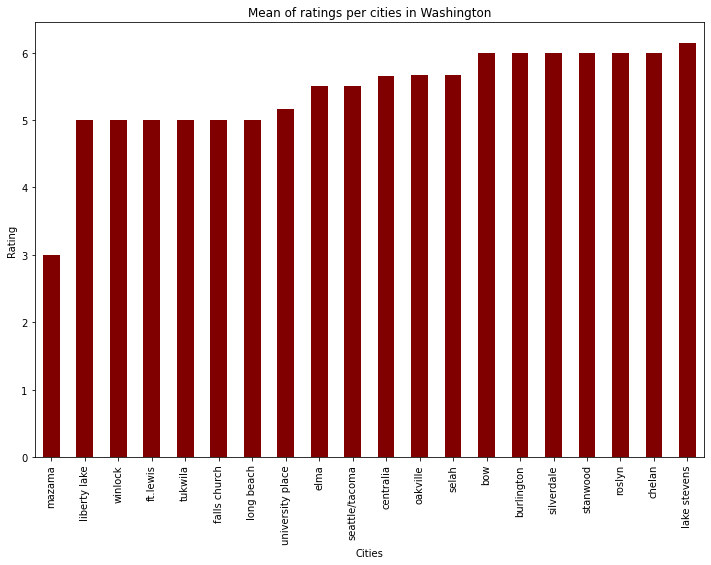

In [104]:
plt.figure(figsize=(12, 8))
ax = worst.plot(kind='bar', color='maroon')
ax.set_title('Mean of ratings per cities in Washington')
ax.set_xlabel('Cities')
ax.set_ylabel('Rating')

#### Question 9: Which author has the biggest number of published books and which is his/her rating?

In [105]:
books.loc[books['Total_num'].idxmax()]



ISBN                                                          0451200993
Book-Title             Sleeping Murder (Miss Marple Mysteries (Paperb...
Book-Author                                              Agatha Christie
Year-Of-Publication                                                 2000
Publisher                                           New American Library
Image-URL-S            http://images.amazon.com/images/P/0451200993.0...
Image-URL-M            http://images.amazon.com/images/P/0451200993.0...
Image-URL-L            http://images.amazon.com/images/P/0451200993.0...
Total_num                                                            597
Name: 1855, dtype: object

In [106]:
agatha = best_book[best_book['Book-Author'].str.contains('Agatha')==True]
agatha['Book-Rating'].mean()

7.769946808510638

#### How looks the curve of ratings of Nora Roberts through years?

In [107]:
nora = best_book[best_book['Book-Author'].str.contains('Nora')==True]
nora['Year-Of-Publication'].sort_values()
nora_ratings=nora.groupby('Year-Of-Publication')['Book-Rating'].mean()
nora_ratings

Year-Of-Publication
1959     8.500000
1972     8.500000
1973     7.500000
1975     7.500000
1976     6.000000
1977     7.000000
1978    10.000000
1979     9.000000
1980    10.000000
1981     6.666667
1982     9.500000
1983     7.833333
1984     7.769231
1985     7.625000
1986     8.500000
1987     6.666667
1988     7.571429
1989     8.166667
1990     7.640000
1991     7.285714
1992     8.409091
1993     7.928571
1994     8.060000
1995     7.490566
1996     7.709677
1997     7.695652
1998     7.612903
1999     7.676829
2000     7.685714
2001     7.551471
2002     7.532982
2003     7.721959
2004     7.978947
Name: Book-Rating, dtype: float64

Text(0, 0.5, 'Rating')

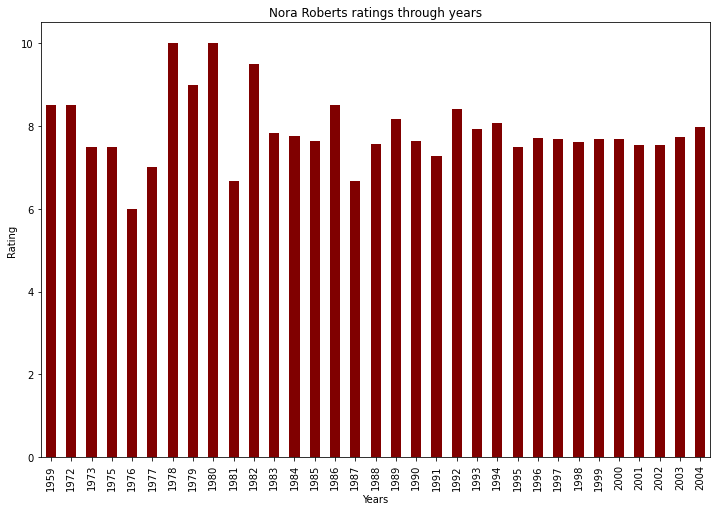

In [108]:
plt.figure(figsize=(12, 8))
ax = nora_ratings.plot(kind='bar', color='maroon')
ax.set_title('Nora Roberts ratings through years')
ax.set_xlabel('Years')
ax.set_ylabel('Rating')

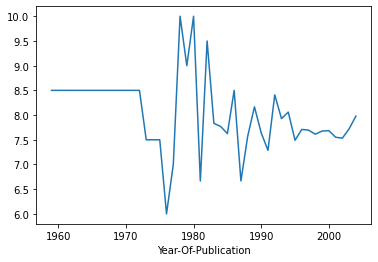

In [109]:
lines = nora_ratings.plot.line(x='Year', y='Rating')

### 10. Whats the average age of users in nyc?

In [110]:
readers = users[users['Age'].isnull()==False]
readers = users[users['Age']!='0']
readers['Age'].astype('int64')
readers = readers[readers['Age'] > '10']

nyc = users[users['City']=='nyc']
nyc['Age'].mean()

5.14117011644456e+61

#### Visualization of the values

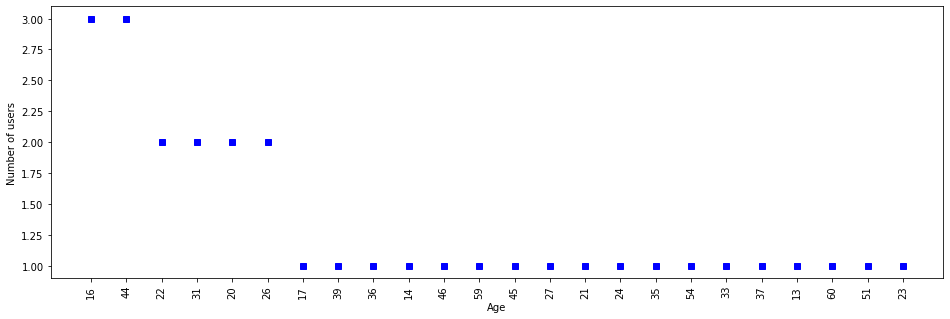

In [111]:
s = nyc['Age'].value_counts()
plt.figure(figsize=(16,5))
plt.plot(s, 'bs')
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.show()

### 11. What's the most read book?

In [112]:
book = best_book.groupby('Book-Title')['User-ID'].count().sort_values(ascending=True)
book.tail(1)

Book-Title
The Lovely Bones: A Novel    635
Name: User-ID, dtype: int64

### 12. What year Oxford University Press published the most books?

In [113]:
oxford = books[books['Publisher'] == 'Oxford University Press']
oxford_val = oxford['Year-Of-Publication'].value_counts().sort_values()
oxford_val.tail(1)

1998    211
Name: Year-Of-Publication, dtype: int64

Text(0, 0.5, 'Year')

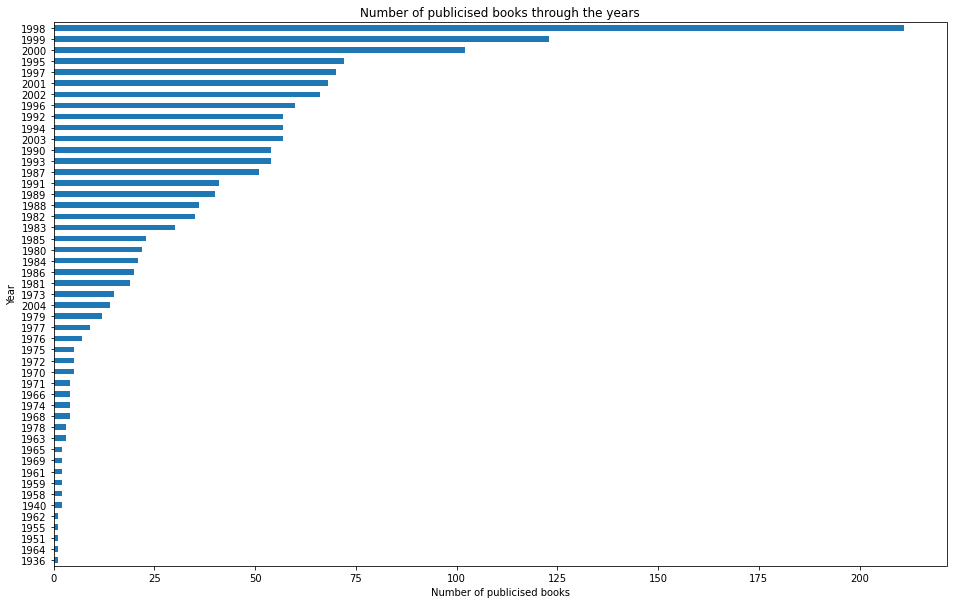

In [116]:
plt.figure(figsize=(16,10))
o = oxford_val.plot(kind='barh')
o.set_title('Number of publicised books through the years')
o.set_xlabel('Number of publicised books')
o.set_ylabel('Year')